# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 데이터 준비

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers','footers','quoters'))
documents = dataset.data
print(len(documents))
documents[0]

11314


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

def clean_text(d):
  pattern = r'[^a-zA-Z\s]'
  text =  re.sub(pattern, '',d)
  return d

def clean_stopword(d):
  stop_words = stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def preprocessing(d):
  return preprocess_string(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd

news_df = pd.DataFrame({'article':documents})
len(news_df)

11314

In [ ]:
news_df.replace('',float('NaN'), inplace=True)
news_df.isnull().values.any()
news_df.dropna(inplace=True)
print(len(news_df))

11311


In [ ]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        James Hogan writes:\n\ntimmbake@mcl.ucsb.edu (...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310    ron.roth@rose.com (ron roth) writes:\n\n|JB>  ...
11311    In article <1qn6tqINNmnf@senator-bedfellow.MIT...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313    In article <15APR199311534452@rosie.uh.edu> st...
Name: article, Length: 11311, dtype: object

In [ ]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure story seem biased. what disagree sta...
1        james hogan writes: timmbake@mcl.ucsb.edu (bak...
2        although realize principle strongest points, w...
3        notwithstanding legitimate fuss proposal, much...
4        well, change scoring playoff pool. unfortunate...
                               ...                        
11309    danny rubenstein, israeli journalist, speaking...
11310    ron.roth@rose.com (ron roth) writes: |jb> romd...
11311    article <1qn6tqinnmnf@senator-bedfellow.mit.ed...
11312    used deskjet orange micros grappler system6.0....
11313    article <15apr199311534452@rosie.uh.edu> st1rp...
Name: article, Length: 11311, dtype: object

In [ ]:
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()
tokenized_news

[['sure',
  'stori',
  'bias',
  'disagre',
  'statement',
  'media',
  'ruin',
  'israel',
  'reput',
  'redicul',
  'media',
  'pro',
  'isra',
  'media',
  'world',
  'have',
  'live',
  'europ',
  'realiz',
  'incid',
  'describ',
  'letter',
  'occur',
  'media',
  'ignor',
  'subsid',
  'israel',
  'exist',
  'european',
  'degre',
  'think',
  'reason',
  'report',
  'clearli',
  'atroc',
  'shame',
  'austria',
  'daili',
  'report',
  'inhuman',
  'act',
  'commit',
  'isra',
  'soldier',
  'bless',
  'receiv',
  'govern',
  'make',
  'holocaust',
  'guilt',
  'awai',
  'look',
  'jew',
  'treat',
  'race',
  'power',
  'unfortun'],
 ['jame',
  'hogan',
  'write',
  'timmbak',
  'mcl',
  'ucsb',
  'edu',
  'bake',
  'timmon',
  'write',
  'jim',
  'hogan',
  'quip',
  'summari',
  'jim',
  'stuff',
  'jim',
  'afraid',
  'miss',
  'point',
  'think',
  'admit',
  'atheist',
  'sleev',
  'suspect',
  'nah',
  'encourag',
  'peopl',
  'learn',
  'atheism',
  'littl',
  'atheist'

In [ ]:
import numpy as np
drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_texts))

11267


## Gensim을 이용한 토픽 모델링

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]

print(corpus[1])

[(47, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 3), (60, 5), (61, 1), (62, 2), (63, 6), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 6), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 9), (94, 1), (95, 1), (96, 1), (97, 2), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 2), (108, 3), (109, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 2), (119, 1), (120, 1), (121, 2), (122, 1), (123, 1), (124, 2), (125, 1), (126, 1), (127, 1), (128, 1), (129, 2), (130, 3), (131, 1), (132, 1), (133, 2), (134, 1), (135, 2), (136, 1), (137, 1), (138, 2), (139, 1), (140, 1)]


### 잠재 의미 분석을 위한 `LsiModel`

In [ ]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi_model.print_topics()
topics

[(0,
  '0.994*"max" + 0.069*"giz" + 0.068*"bhj" + 0.025*"qax" + 0.015*"biz" + 0.014*"nrhj" + 0.014*"bxn" + 0.012*"nui" + 0.011*"ghj" + 0.011*"zei"'),
 (1,
  '0.354*"file" + 0.182*"program" + 0.178*"edu" + 0.150*"imag" + 0.123*"avail" + 0.116*"peopl" + 0.114*"output" + 0.114*"includ" + 0.111*"inform" + 0.110*"time"'),
 (2,
  '0.419*"file" + 0.289*"output" + -0.207*"peopl" + 0.187*"entri" + -0.172*"know" + -0.145*"said" + 0.144*"program" + -0.143*"think" + -0.120*"like" + 0.117*"onam"'),
 (3,
  '-0.274*"output" + 0.239*"imag" + 0.222*"edu" + -0.192*"entri" + 0.159*"avail" + -0.140*"file" + -0.135*"peopl" + 0.126*"pub" + 0.125*"jpeg" + 0.121*"version"'),
 (4,
  '-0.571*"wire" + -0.235*"ground" + 0.207*"file" + 0.184*"jpeg" + -0.171*"circuit" + -0.165*"outlet" + 0.148*"imag" + -0.144*"connect" + -0.132*"neutral" + -0.131*"gfci"'),
 (5,
  '0.401*"jpeg" + 0.351*"imag" + -0.281*"anonym" + 0.185*"wire" + -0.168*"privaci" + -0.161*"internet" + 0.154*"color" + -0.148*"post" + -0.128*"inform" + -

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_score = []

for num_topics in range(min_topics, max_topics):
  model = LsiModel(corpus, num_topics = num_topics, id2word=dictionary)
  coherence = CoherenceModel(model=model,
                             texts=news_texts,
                             dictionary=dictionary)
  coherence_score.append(coherence.get_coherence())
print(coherence_score)

[0.40929174940769963, 0.4511377434473393, 0.4623037102836091, 0.4547877841789735, 0.4363883600167509]


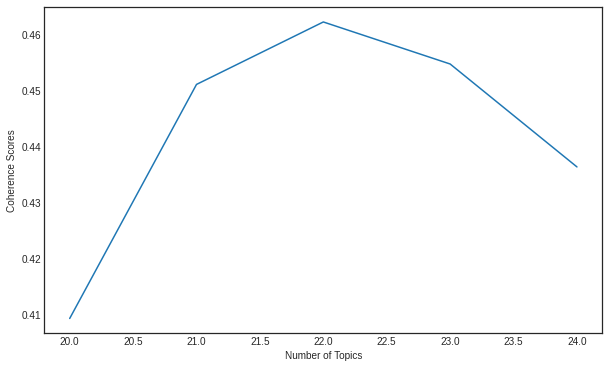

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [i for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [ ]:
lsi_model = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi_model.print_topics(num_topics=20)
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '0.354*"file" + 0.182*"program" + 0.178*"edu" + 0.150*"imag" + 0.123*"avail" + 0.116*"peopl" + 0.114*"output" + 0.114*"includ" + 0.111*"inform" + 0.110*"time"'),
 (2,
  '-0.419*"file" + -0.289*"output" + 0.207*"peopl" + -0.187*"entri" + 0.172*"know" + 0.145*"said" + -0.144*"program" + 0.143*"think" + 0.120*"like" + -0.117*"onam"'),
 (3,
  '0.274*"output" + -0.239*"imag" + -0.222*"edu" + 0.192*"entri" + -0.159*"avail" + 0.140*"file" + 0.135*"peopl" + -0.126*"pub" + -0.125*"jpeg" + -0.121*"version"'),
 (4,
  '-0.571*"wire" + -0.235*"ground" + 0.207*"file" + 0.184*"jpeg" + -0.171*"circuit" + -0.165*"outlet" + 0.148*"imag" + -0.144*"connect" + -0.132*"neutral" + -0.131*"gfci"'),
 (5,
  '0.401*"jpeg" + 0.351*"imag" + -0.281*"anonym" + 0.185*"wire" + -0.168*"privaci" + -0.161*"internet" + 0.154*"color" + -0.148*"post" + -0.128*

### 잠재 디리클레 할당을 위한 `LdaModel`

In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary)
topics = lda_model.print_topics()
topics

[(0,
  '0.017*"kei" + 0.014*"encrypt" + 0.010*"chip" + 0.010*"secur" + 0.008*"public" + 0.008*"clipper" + 0.006*"messag" + 0.006*"privaci" + 0.006*"algorithm" + 0.005*"inform"'),
 (1,
  '0.018*"file" + 0.013*"edu" + 0.011*"program" + 0.009*"entri" + 0.008*"avail" + 0.008*"write" + 0.007*"com" + 0.006*"output" + 0.006*"sourc" + 0.006*"includ"'),
 (2,
  '0.009*"like" + 0.008*"work" + 0.008*"write" + 0.007*"card" + 0.007*"edu" + 0.007*"know" + 0.007*"problem" + 0.007*"thank" + 0.006*"need" + 0.005*"price"'),
 (3,
  '0.024*"drive" + 0.013*"scsi" + 0.012*"bit" + 0.010*"disk" + 0.008*"data" + 0.008*"control" + 0.006*"output" + 0.006*"work" + 0.006*"tape" + 0.005*"mode"'),
 (4,
  '0.006*"year" + 0.006*"team" + 0.005*"turkish" + 0.005*"greek" + 0.005*"cub" + 0.004*"edu" + 0.004*"histori" + 0.004*"write" + 0.004*"jew" + 0.004*"divis"'),
 (5,
  '0.009*"program" + 0.007*"presid" + 0.006*"obfusc" + 0.005*"work" + 0.005*"know" + 0.004*"time" + 0.004*"like" + 0.004*"helmet" + 0.004*"stderr" + 0.004*

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_score = []

for num_topics in range(min_topics, max_topics):
  model = LdaModel(corpus, num_topics = num_topics, id2word=dictionary)
  coherence = CoherenceModel(model=model,
                             texts=news_texts,
                             dictionary=dictionary)
  coherence_score.append(coherence.get_coherence())
print(coherence_score)

[0.4919039551034202, 0.43061645153042527, 0.4603393861682956, 0.43378299254916874, 0.43437510368527327]


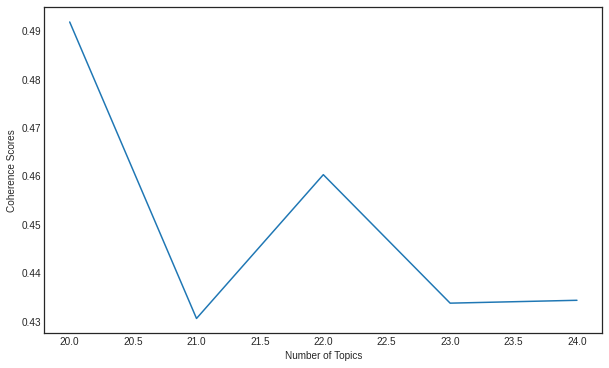

In [ ]:
x = [i for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [ ]:
lda_model = LdaModel(corpus, num_topics=21, id2word=dictionary)
topics = lda_model.print_topics(num_topics=21)
topics

[(0,
  '0.015*"kei" + 0.011*"encrypt" + 0.009*"wire" + 0.007*"ground" + 0.007*"secur" + 0.006*"public" + 0.006*"ripem" + 0.005*"clipper" + 0.005*"tobacco" + 0.005*"technolog"'),
 (1,
  '0.013*"chip" + 0.009*"phone" + 0.007*"mail" + 0.007*"encrypt" + 0.007*"inform" + 0.007*"kei" + 0.007*"file" + 0.006*"post" + 0.006*"anonym" + 0.006*"secur"'),
 (2,
  '0.178*"max" + 0.023*"giz" + 0.020*"bhj" + 0.012*"bxn" + 0.006*"qax" + 0.005*"nrhj" + 0.004*"water" + 0.004*"biz" + 0.004*"wmu" + 0.004*"gizw"'),
 (3,
  '0.010*"peopl" + 0.008*"right" + 0.006*"state" + 0.006*"think" + 0.006*"govern" + 0.005*"write" + 0.004*"know" + 0.004*"time" + 0.004*"articl" + 0.004*"moral"'),
 (4,
  '0.009*"like" + 0.009*"write" + 0.007*"year" + 0.007*"look" + 0.007*"articl" + 0.006*"good" + 0.006*"time" + 0.006*"car" + 0.005*"run" + 0.005*"think"'),
 (5,
  '0.008*"articl" + 0.008*"write" + 0.008*"like" + 0.008*"bike" + 0.007*"com" + 0.006*"edu" + 0.006*"good" + 0.005*"ride" + 0.005*"time" + 0.005*"know"'),
 (6,
  '0.02

## 토픽 모델링 시각화

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.9MB/s 
     |████████████████████████████████| 552kB 17.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=a9fd56411d89ab79577f854a3f7c291cf79681bb8adb61ba204b50b515d32f0d
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=3fde0b650f840a42b4adeb7057375bd212a99582b48e57035b37e5bf9971b184
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)